## Data processing description

Date: 2020-10-11

### Hello Carlton!

This is a step-by-step description how I am calculating data for CarltonIndex.

Hopefully this helps us to settle a desired data processing algorithm.

I tried to make this code simple and clear. I am explaining what I am doing in comments and I am showing intermediate results after each step.

I am using DAILY data because we will need to show a fresh data on the Collective2 pages every day.

Let's get an arbitrary system as an example: https://collective2.com/details/123071731

In [4]:
# Load packages and helper functions used in calculations
source("utils.R")

strategyId = 123071731

[1] "Initialization done"


In [5]:
# ==================================================
# Get daily equity data from the C2 database
# ==================================================
dbData = readData(strategyId)

# Show a sample of data we have
head(dbData,n=10)
tail(dbData)   

,dateTime,value
,<chr>,<dbl>
1,2019-03-26 00:00:00,31477.00
2,2019-03-27 00:00:00,32998.68
3,2019-03-28 00:00:00,33515.56
4,2019-03-29 00:00:00,33501.78
5,2019-03-30 00:00:00,33501.78
6,2019-03-31 00:00:00,33504.78
7,2019-04-01 00:00:00,33407.74
8,2019-04-02 00:00:00,33132.38
9,2019-04-03 00:00:00,33726.10


,dateTime,value
,<chr>,<dbl>
557,2020-10-02 00:00:00,58719.96
558,2020-10-03 00:00:00,58719.96
559,2020-10-04 00:00:00,58719.96
560,2020-10-05 00:00:00,58719.96
561,2020-10-06 00:00:00,58719.96
562,2020-10-07 00:00:00,58719.96


In [6]:
# Convert data to time series structure for further processing. This operation does not change any values.
series = transformDataToTimeSeries(dbData)

# ----------------------------------------------------------------------------------------
# Calculate returns. 
# We can have "log" or "discrete" returns representation. 
# Let's get "discrete": (Return2 - Return1) / Return1
# ----------------------------------------------------------------------------------------

# --------------------------------------------
# let's describe and debug returns calculation 
# --------------------------------------------
debugseries = as.numeric(series); len = length(debugseries)
# The first return should be: (secondVal - firstVal) / firstVal
firstReturn = (debugseries[2] - debugseries[1]) / debugseries[1]
print(sprintf("The first return should be %.8f",firstReturn))


[1] "The first return should be 0.04834260"


In [7]:
# ----------------------------------------------------------------------------------------
# Calculate returns. 
# ----------------------------------------------------------------------------------------
returns = CalculateReturns(series, method = "discrete")
# Remove the first value which is undefined (NA)
returns =  returns[-1]

# Show first and last data we have now
head(returns)
tail(returns) 


                   Close
2019-03-27  4.834260e-02
2019-03-28  1.566366e-02
2019-03-29 -4.111523e-04
2019-03-30  0.000000e+00
2019-03-31  8.954748e-05
2019-04-01 -2.896303e-03

                 Close
2020-10-02 0.003011428
2020-10-03 0.000000000
2020-10-04 0.000000000
2020-10-05 0.000000000
2020-10-06 0.000000000
2020-10-07 0.000000000

In [62]:
# Calculate Rolling performance from returns using 210-days time windows.





# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!





# Let's apply annualization.
# We can have geometric or arithmetic annualization.
# According to the CFA Institute's Global Investment Performance Standards (GIPS)
#    "Returns for periods of less than one year must not be annualized."

# So we can't use a formula like: prod(1 + R)^(365/n) - 1
# We will use a simple returns formula: annReturn = mean(R) * 365

# However, I think any annulization is problematic here. 
# It is just a guessing from the crystal ball. Do we really need it?

# ------------------------------------------------------
# let's debug it a little and verify apply.rolling command results
#print(sprintf("The first annReturn should be %.7f",mean(head(returns,30)) * 365))
#print(sprintf("The last annReturn should be %.7f",mean(tail(returns,30)) * 365))

print(sprintf("The first annReturn should be %.7f", ( returns[30]-returns[1]) / returns[1]) )
print(sprintf("The last annReturn should be %.7f",mean(tail(returns,30)) * 365))

returns[1]
returns[30]


character(0)
[1] "The last annReturn should be 0.3942886"


               Close
2019-03-27 0.0483426

                 Close
2019-04-25 0.002664816

In [11]:
# Calculate actual returns over last 30 days
return30 = apply.rolling(series, width=30, FUN = function(eq) { (eq[30] - eq[1]) / eq[1] })

# Remove undefined rows
return30 = na.omit(return30); colnames(return30) = "Return30"

# Show what we have:
head(return30)
tail(return30)


            Return30
2019-04-24 0.1826362
2019-04-25 0.1311071
2019-04-26 0.1107163
2019-04-27 0.1111732
2019-04-28 0.1111732
2019-04-29 0.1189669

             Return30
2020-10-02 0.07742453
2020-10-03 0.03274210
2020-10-04 0.03274210
2020-10-05 0.03274210
2020-10-06 0.03274210
2020-10-07 0.03274210

In [16]:
# Calculate rolling standard deviation in 90-days time windows and annualize it the same way as returns.
# (We can use 120, 150, 180, 210 days too. But let's make this description short and work just with one SD.)

# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!
# NO ANNUALIZATION !!!!!!!!!!!!!!!

#sd090 = apply.rolling(returns, width=90, FUN = function(R) { sd(R) * 365} ); 
sd090 = apply.rolling(returns, width=90, FUN = function(R) { sd(R) } ); 

# Remove first 89 undefined values from data
sd090 = na.omit(sd090); colnames(sd090) = "SD090"

# sd090 = sd090 * 10 scaling

# Show what we have
head(sd090)
tail(sd090)

                SD090
2019-06-24 0.08778399
2019-06-25 0.07375536
2019-06-26 0.07286232
2019-06-27 0.07284151
2019-06-28 0.07284151
2019-06-29 0.07284570

                SD090
2020-10-02 0.06386641
2020-10-03 0.06386641
2020-10-04 0.06386641
2020-10-05 0.06386641
2020-10-06 0.06382249
2020-10-07 0.06382249

In [17]:
# In reality, we are doing all the above for many trading systems which takes long time. 
# We store results to the database which allows us to select some interesting data for further investigation later.
# storeDataToDb(sd090,annReturn)

# In this example, we just bind data together by dates and show what we have.
data = bindDataTogether(series,return30,sd090)
head(data)
tail(data)

date,Close,Return30,SD090
<dttm>,<dbl>,<dbl>,<dbl>
2019-06-24,43583.63,-0.011161958,0.08778399
2019-06-25,43657.91,-0.011052908,0.07375536
2019-06-26,44073.55,0.010559461,0.07286232
2019-06-27,44073.55,0.010559461,0.07284151
2019-06-28,44073.55,0.004039756,0.07284151
2019-06-29,44073.55,0.006900609,0.07284570


date,Close,Return30,SD090
<dttm>,<dbl>,<dbl>,<dbl>
2020-10-02,58719.96,0.07742453,0.06386641
2020-10-03,58719.96,0.03274210,0.06386641
2020-10-04,58719.96,0.03274210,0.06386641
2020-10-05,58719.96,0.03274210,0.06386641
2020-10-06,58719.96,0.03274210,0.06382249
2020-10-07,58719.96,0.03274210,0.06382249


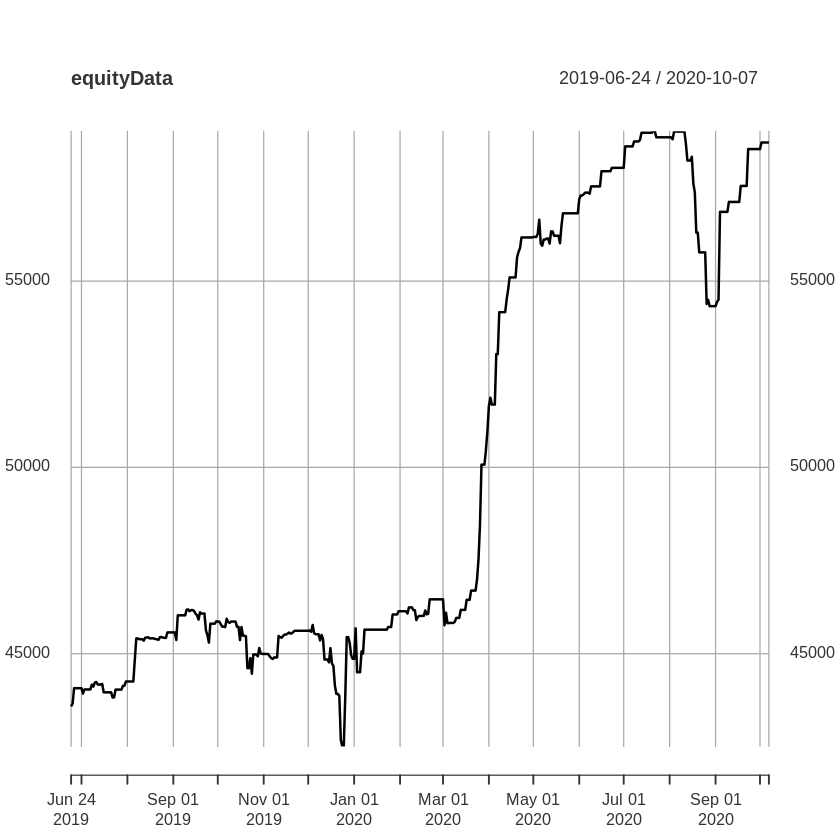

               Return30      SD090
2019-06-24 -0.011161958 0.08778399
2019-06-25 -0.011052908 0.07375536
2019-06-26  0.010559461 0.07286232
2019-06-27  0.010559461 0.07284151
2019-06-28  0.004039756 0.07284151
2019-06-29  0.006900609 0.07284570

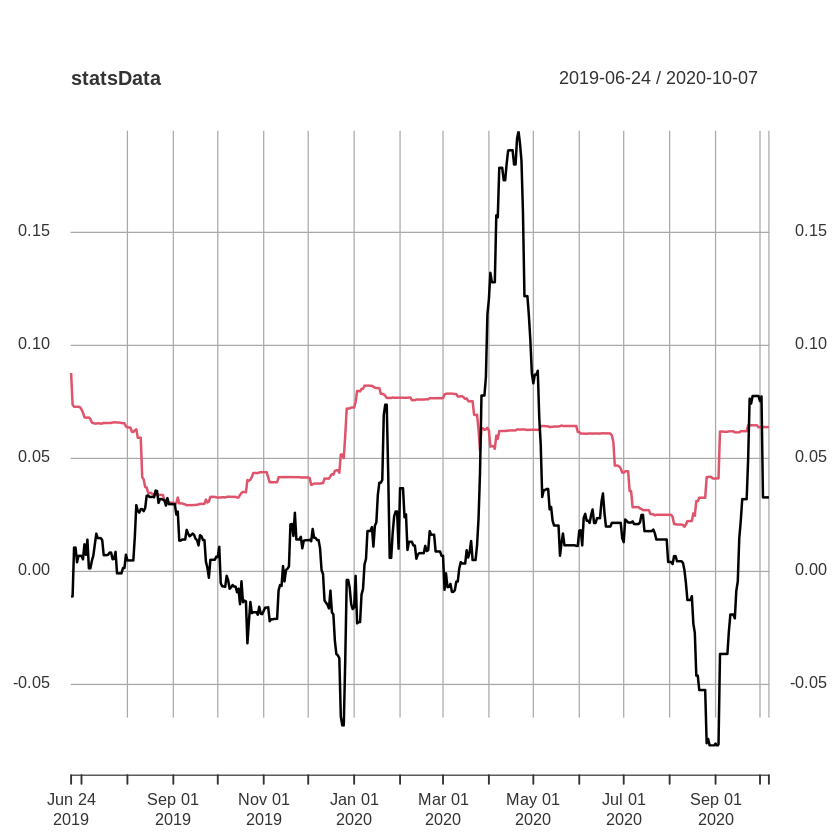

In [18]:
# Prepare data for plots and show them
equityData <- as.xts.data.table(data[,list(date, Close)])
plot(equityData)

statsData <- as.xts.data.table(data[,list(date, Return30, SD090)])
plot(statsData)
head(statsData)

               Return30      SD090 CarltonIndex090
2019-06-24 -0.011161958 0.08778399     -0.12715255
2019-06-25 -0.011052908 0.07375536     -0.14985905
2019-06-26  0.010559461 0.07286232      0.14492349
2019-06-27  0.010559461 0.07284151      0.14496489
2019-06-28  0.004039756 0.07284151      0.05545953
2019-06-29  0.006900609 0.07284570      0.09472912

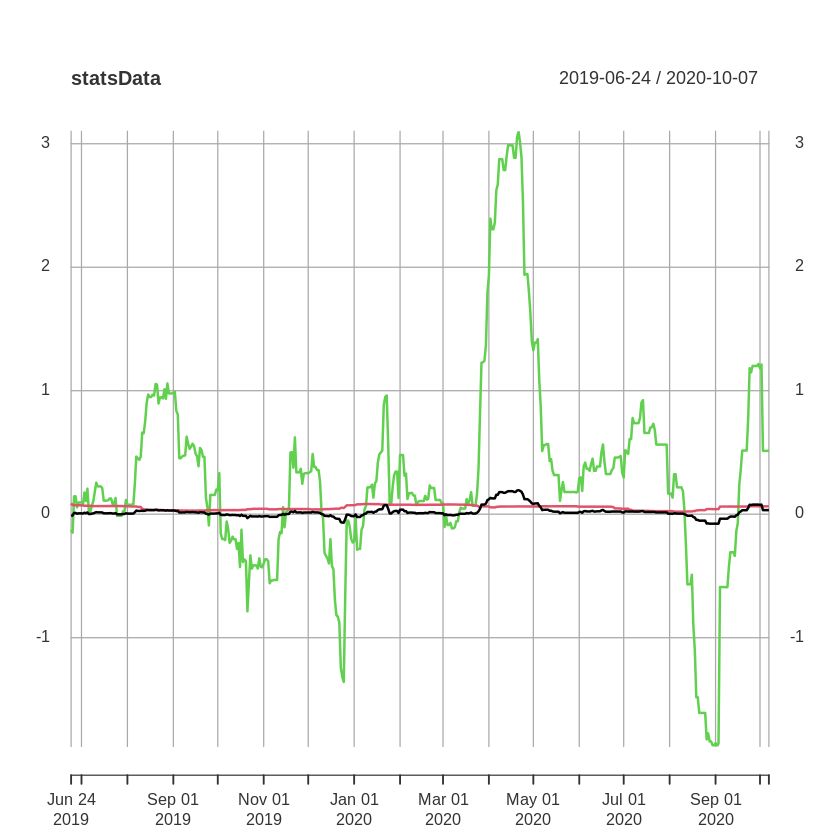

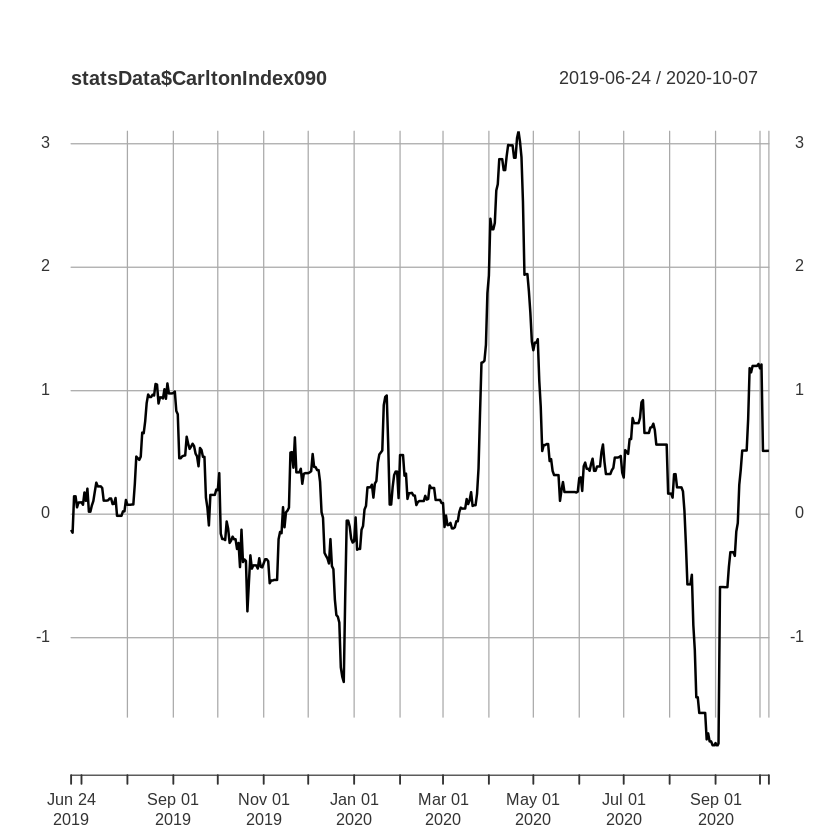

In [19]:
# Let's caculate and plot CarltonIndex now: 0.1 * AnnReturn210 / SD090
# Let's omit multiplication by 0.1 here for plotting purposes.

statsData$CarltonIndex090 <- statsData$Return30 / statsData$SD090 

head(statsData)
plot(statsData)

# Plot CarltonIndex alone
plot(statsData$CarltonIndex090)
#head(statsData$CarltonIndex090)
#tail(statsData$CarltonIndex090)